In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path ="data.xlsx"

#pk_i = pd.read_excel(path,sheet_name="complete_for_individuals",index_col=0)
#pk_g = pd.read_excel(path,sheet_name="complete_for_groups",index_col=0)

pk_i = pd.read_csv("complete_for_individuals.tsv", sep='\t', index_col=0 )
pk_g = pd.read_csv("complete_for_groups.tsv", sep='\t', index_col=0)

In [3]:
pk_i.columns = [eval(c) if "," in c else c for c in list(pk_i.columns) ]
pk_g.columns = [eval(c) if "," in c else c for c in list(pk_g.columns) ]

# Filter Out Balogh1992Bad Data!

In [4]:
pk_i = pk_i[(pk_i[('study', '')] != "Balogh1992")]
pk_g = pk_g[(pk_g[('study', '')] != "Balogh1992")]

In [5]:
# filter caffeine clearance healthy
#& (pk_i.application == "single dose") \

idx = (pk_i.substance_name_intervention == 'caffeine') \
       & (pk_i.substance_name == 'caffeine') \
       & (pk_i[ ('healthy', 'choice')] == 'Y')\
       & (pk_i[ 'tissue'] == 'plasma') 
    
pk_i = pk_i[idx]
print("Number of measurements for individuals with selected criteria:" ,len(pk_i))

Number of measurements for individuals with selected criteria: 2244


In [6]:
idx = (pk_g.substance_name_intervention == 'caffeine') \
       & (pk_g.substance_name == 'caffeine') \
       & (pk_g[ ('healthy', 'choice')] == 'Y') \
       & (pk_g[ 'tissue'] == 'plasma')
    
pk_g = pk_g[idx]
print("Number of measurements for groups with selected criteria:" ,len(pk_g))

Number of measurements for groups with selected criteria: 728


In [7]:
print("Individuals")
print("unit intervetion:")
print(pk_i.unit_intervention.unique())

# absolute dose
idx_dose_abs_i = (pk_i.unit_intervention == 'mg')
# clearance per bodyweight
idx_dose_rel_i = (pk_i.unit_intervention == 'mg/kg')


Individuals
unit intervetion:
['mg' 'mg/kg']


In [8]:
print("Groups")
print("unit intervetion:")
print(pk_g.unit_intervention.unique())

# absolute dose
idx_dose_abs_g = (pk_g.unit_intervention == 'mg')
# clearance per bodyweight
idx_dose_rel_g = (pk_g.unit_intervention == 'mg/kg')

Groups
unit intervetion:
['mg/kg' 'mg']


In [9]:
#individuals_df = individuals_df[individuals_df["oral contraceptives"]["choice"]=="Y"]
#pk_i = pd.merge(pk,individuals_df.reset_index(),  how='inner', suffixes=('','subject'),left_on='individual_pk', right_on="subject_pk")


In [10]:
#pk_i[("oral contraceptives","choice")]

In [11]:
# Styles for plots
ccolors = {'control': 'black',
           'smoking': 'blue',
           'oc': 'green',
          }
markers = {'control': 's',
           'smoking': 'o',
           'oc': 'o',
          }

cateogry_filter = {
    'control':{
        ('smoking', 'choice'):"N",
        ('oral contraceptives', 'choice'):'N'},
    'smoking':{
        ('smoking', 'choice'):"Y"}, 
    'oc':{
        ('oral contraceptives', 'choice'):'Y'}
}    


In [12]:
#ccolors = {'men': 'black',
#           'female': 'blue',
#           
#          }
#markers = {'men': 's',
#           'female': 'o',
#          }

#cateogry_filter = {
#    'men':{
#        ('sex', 'choice'):"M"},
#    'female':{
#        ('sex', 'choice'):"F"}    
#}    


In [13]:
#ccolors = {'homo sapiens': 'black',
#           
#          }
#markers = {'homo sapiens': 's',
#          }
#
#cateogry_filter = {
#    'homo sapiens':{
#        ('species', 'choice'):"homo sapiens"}, 
#}    


In [14]:
def data_pktype(pktype, pk):
    data = pk[pk.pktype==pktype]
    print('{} ({})'.format(pktype, len(data)))
    print("units:", data.unit.unique())
    return data
    
# clearance data
print("Individuals")
cl_data_i = data_pktype('clearance', pk_i)
# absolute clearance
idx_cl_abs_i = (cl_data_i.unit == 'ml/min')
# clearance per bodyweight
idx_cl_rel_i = (cl_data_i.unit == 'ml/min/kg')

# clearance data
print("Groups")
cl_data_g = data_pktype('clearance', pk_g)
# absolute clearance
idx_cl_abs_g = (cl_data_g.unit == 'ml/min')
# clearance per bodyweight
idx_cl_rel_g = (cl_data_g.unit == 'ml/min/kg')

Individuals
clearance (804)
units: ['ml/min' 'ml/min/kg']
Groups
clearance (182)
units: ['ml/min' 'ml/min/kg' 'ml/min/1.73m^2']


In [15]:
cl_data_i.groupby("unit")["value"].count()

unit
ml/min       385
ml/min/kg    416
Name: value, dtype: int64

In [16]:
cl_data_g.groupby("unit")["mean"].count()

unit
ml/min            78
ml/min/1.73m^2     4
ml/min/kg         96
Name: mean, dtype: int64

In [17]:
def filter_df(filter_dict, df):
    for filter_key, filter_value in filter_dict.items():
        df = df[df[filter_key]==filter_value]
    return df

In [18]:
for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,cl_data_i)
        print(category, len(df_category))

control 325
smoking 300
oc 141


## Individual caffeine plots

/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


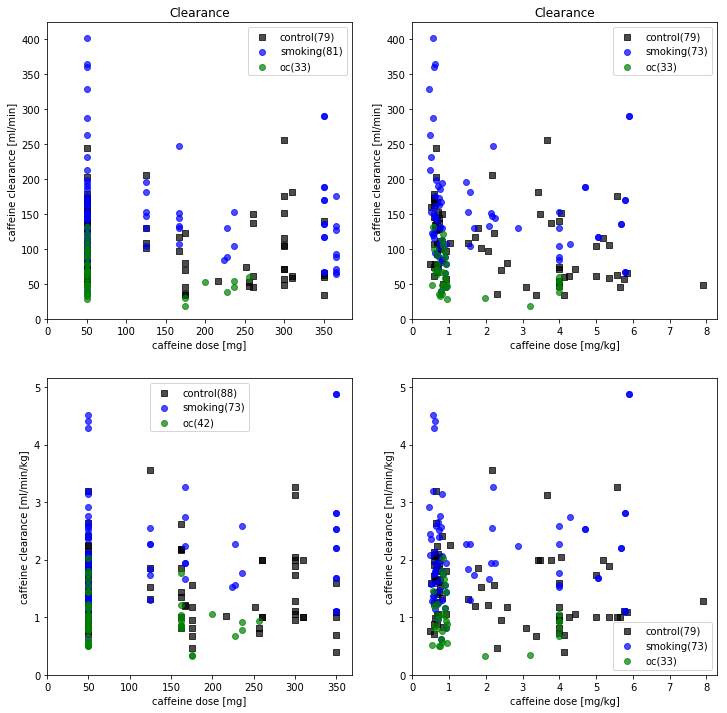

In [19]:
# plot caffeine clearance
data = cl_data_i
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

dinds = [idx_dose_abs_i & idx_cl_abs_i,
         idx_dose_rel_i & idx_cl_abs_i,
         idx_dose_abs_i & idx_cl_rel_i,
         idx_dose_rel_i & idx_cl_rel_i]
for ax, inds in zip((ax1, ax2, ax3, ax4), dinds):
    df = data[inds]
    
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y = df_category.value
        ax.scatter(x, y,color=ccolors[category], marker=markers[category], label=f"{category}({len(x)})", alpha=0.7)
        #sns.distplot( y,ax =ax,color=ccolors[category],  label=f"{category}({len(x)})",kde_kws={'clip': (0.0,100000 )})

        #for i, txt in enumerate(df_category[('study', '')]):
        #    ax.annotate(txt, (x.iloc[[i]],
        #                      y.iloc[[i]]), alpha=0.7)
    
for ax in (ax1, ax2, ax3, ax4):
    ax.set_ylim(bottom=0)
    ax.legend()



for ax in (ax1, ax2):
    ax.set_title('Clearance')
    ax.set_ylabel('caffeine clearance [ml/min]')
    #ax.set_ylim([0, 300])
    ax.set_ylim(bottom=0)

    
for ax in (ax3, ax4):
    ax.set_ylabel('caffeine clearance [ml/min/kg]')
    #ax.set_ylim([0, 5])
    ax.set_ylim(bottom=0)

for ax in (ax1, ax3):
    #ax.set_xlim(0, 500)
    ax.set_xlabel('caffeine dose [mg]')
    ax.set_xlim(left=0)

for ax in (ax2, ax4):
    #ax.set_xlim(0, 11)
    ax.set_xlim(left=0)

    ax.set_xlabel('caffeine dose [mg/kg]')

/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


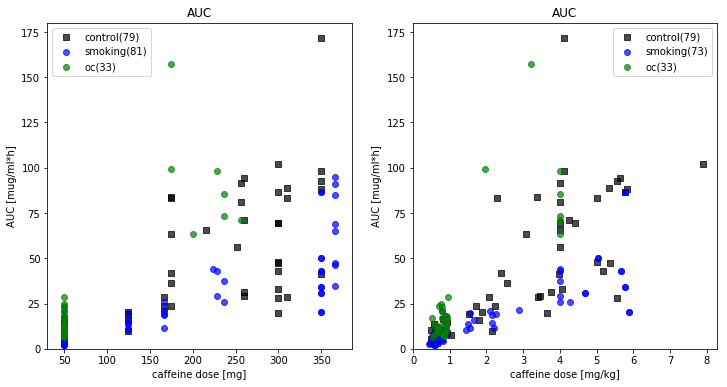

In [20]:
# plot caffeine auc
data = cl_data_i
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

dinds = [idx_dose_abs_i & idx_cl_abs_i,
         idx_dose_rel_i & idx_cl_rel_i]
for ax, inds in zip((ax1, ax2), dinds):
    df = data[inds]
    
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y =(df_category["value_intervention"] / df_category.value)*1000 /60        
        ax.scatter(x, y,color=ccolors[category], marker=markers[category], label=f"{category}({len(x)})", alpha=0.7)
        #sns.distplot( y,ax =ax,color=ccolors[category],  label=f"{category}({len(x)})",kde_kws={'clip': (0.0,100000 )})

        #for i, txt in enumerate(df_category[('study', '')]):
        #    ax.annotate(txt, (x.iloc[[i]],
        #                      y.iloc[[i]]), alpha=0.7)
    
for ax in (ax1, ax2):
    ax.set_title("AUC")
    ax.set_ylabel('AUC [mug/ml*h]')
    ax.set_ylim(bottom=0)
    ax.legend()
    
    
for ax in (ax1, ):
    #ax.set_xlim(0, 500)
    ax.set_xlabel('caffeine dose [mg]')
for ax in (ax2, ):
    #ax.set_xlim(0, 11)
    ax.set_xlabel('caffeine dose [mg/kg]')


In [21]:
## Group caffeine plots

In [22]:
for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,cl_data_g)
        print(category, len(df_category))

control 58
smoking 32
oc 12


In [23]:
#cl_data_g.groupby([('oral contraceptives', 'choice'),('smoking', 'choice')])["mean"].count()
#len(cl_data_g)
#cl_data_g.groupby(('smoking', 'choice'))
#cl_data_g[[('smoking', "count"),('oral contraceptives', "count")]]

/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


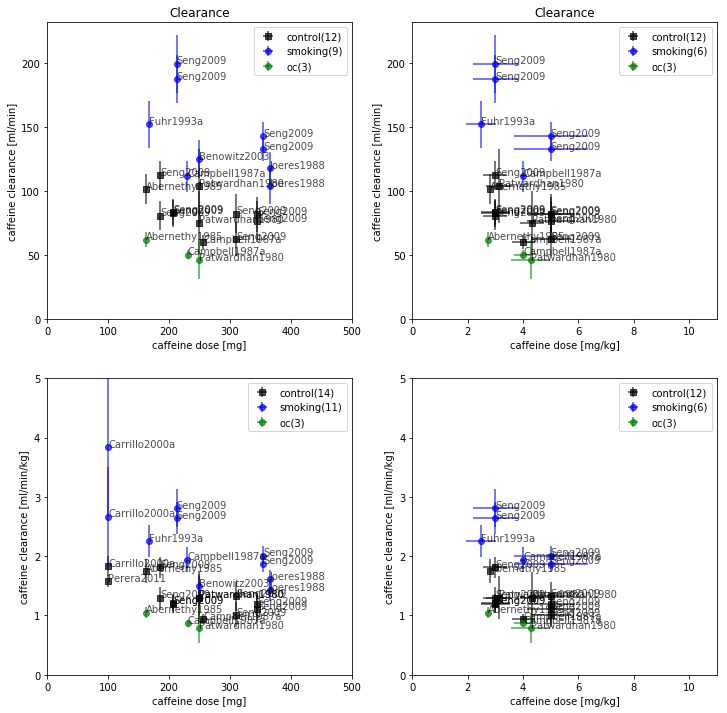

In [24]:
# plot caffeine clearance
data = cl_data_g[cl_data_g["mean"].notnull()]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

dinds = [idx_dose_abs_g & idx_cl_abs_g,
         idx_dose_rel_g & idx_cl_abs_g,
         idx_dose_abs_g & idx_cl_rel_g,
         idx_dose_rel_g & idx_cl_rel_g]
for ax, inds in zip((ax1, ax2, ax3, ax4), dinds):
    df = data[inds]
    
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        y = df_category["mean"]
        if ax in (ax2, ax4):
            xerr = (df_category[("weight","sd")]/df_category[("weight","mean")])*x
        else:
            xerr = 0
        yerr = df_category["se"]
        #sns.distplot( y,ax =ax,color=ccolors[category],  label=f"{category}({len(x)})",kde_kws={'clip': (0.0,100000 )})

        ax.errorbar(x, y,yerr=yerr,xerr=xerr,color=ccolors[category], fmt=markers[category],  label=f"{category}({len(x)})", alpha=0.7)
        for i, txt in enumerate(df_category[('study', '')]):
            ax.annotate(txt, (x.iloc[[i]],
                              y.iloc[[i]]), alpha=0.7)
    
for ax in (ax1, ax2, ax3, ax4):
    ax.set_ylim(bottom=0)
    ax.legend()

for ax in (ax1, ax2):
    ax.set_title('Clearance')
    ax.set_ylabel('caffeine clearance [ml/min]')
    #ax.set_ylim([0, 300])
    ax.set_ylim(bottom=0)

    
for ax in (ax3, ax4):
    ax.set_ylabel('caffeine clearance [ml/min/kg]')
    ax.set_ylim([0, 5])
    # ax.set_ylim(bottom=0)

for ax in (ax1, ax3):
    ax.set_xlabel('caffeine dose [mg]')
    ax.set_xlim(0, 500)
    # ax.set_xlim(left=0)

for ax in (ax2, ax4):
    ax.set_xlim(0, 11)
    # ax.set_xlim(left=0)

    ax.set_xlabel('caffeine dose [mg/kg]')

/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


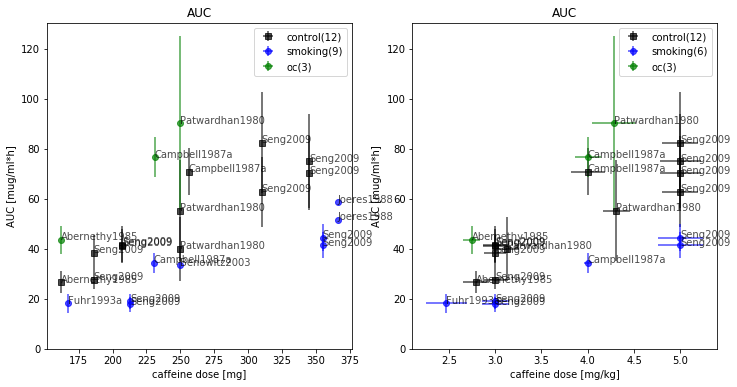

In [25]:
# plot caffeine auc
data = cl_data_g[cl_data_g["mean"].notnull()]
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

dinds = [idx_dose_abs_g & idx_cl_abs_g,
         idx_dose_rel_g & idx_cl_rel_g]
for ax, inds in zip((ax1, ax2), dinds):
    df = data[inds]
    
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y =(df_category["value_intervention"] / df_category["mean"])*1000 /60
        
    
        if ax in (ax2, ax4):
            xerr = (df_category[("weight","se")]/df_category[("weight","mean")])*x
        else:
            xerr = 0
        yerr = ((df_category["se"]/df_category["mean"])+(df_category[("weight","se")]/df_category[("weight","mean")]))*y
        #sns.distplot( y,ax =ax,color=ccolors[category],  label=f"{category}({len(x)})",kde_kws={'clip': (0.0,100000 )})

        ax.errorbar(x, y,yerr=yerr,xerr=xerr,color=ccolors[category], fmt=markers[category],  label=f"{category}({len(x)})", alpha=0.7)
        for i, txt in enumerate(df_category[('study', '')]):
            ax.annotate(txt, (x.iloc[[i]],
                              y.iloc[[i]]), alpha=0.7)
    
for ax in (ax1, ax2):
    ax.set_title("AUC")
    ax.set_ylabel('AUC [mug/ml*h]')
    ax.set_ylim(bottom=0)
    ax.legend()
    
    
for ax in (ax1, ):
    #ax.set_xlim(0, 500)
    ax.set_xlabel('caffeine dose [mg]')
for ax in (ax2, ):
    #ax.set_xlim(0, 11)
    ax.set_xlabel('caffeine dose [mg/kg]')

**TODO**
- create plots for other pharmacokinetic parameters (halflife, tmax, ...)
- plot other entries: i.e., plot all results which are not part of "control, smoking & oc"
- add derived pharmacokinetic parameters (from time courses)
- add indidividual data from caffeine studies (clinical partners)
- add x-errorbars for calculated doses based on SD/SE on body weights
- calculate group data from individuals


**Missing Entries**
- Parsons1978 (incorrect in original figure, mixing in oral contraceptives, but individual data with smoking information exists)
- Bonati1982 (incorrect in original figure, smoking information missing)
- Cheng1990 (incorrect in original figure, no oc information, mixing smoking)
- Haller2002 (incorrect in original figure, mixing in oral contraceptives)
- Renner1984
- Benowitz2003 (added MK)


## half-life

### Individuals

thalf (380)
units: ['h']


/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


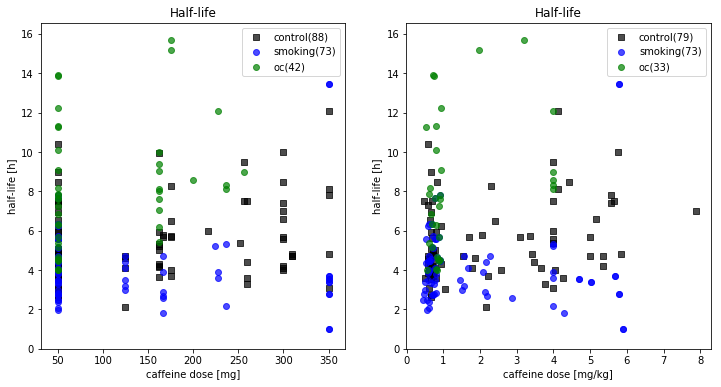

In [26]:
# plot apparent volume of distribution
data = data_pktype('thalf',pk_i)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

dinds = [idx_dose_abs_i,
         idx_dose_rel_i]
for ax, inds in zip((ax1, ax2), dinds):
    df = data[inds]
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y = df_category.value
        ax.scatter(x, y,color=ccolors[category], marker=markers[category], label=f"{category}({len(x)})", alpha=0.7)
for ax in (ax1, ax2):
    ax.set_title("Half-life")
    ax.set_ylabel('half-life [h]')
    ax.set_ylim(bottom=0)
    ax.legend()
    
for ax in (ax1, ):
    
    ax.set_xlabel('caffeine dose [mg]')
for ax in (ax2, ):

    ax.set_xlabel('caffeine dose [mg/kg]')

In [27]:
pk_i[(pk_i["value_intervention"]==350) &( pk_i["pktype"]=="thalf")][[('study', ''),"value"]]

,"(study, )",value
670,ZylberKatz1984,3.10
678,ZylberKatz1984,4.80
686,ZylberKatz1984,12.10
694,ZylberKatz1984,8.10
702,ZylberKatz1984,7.80
924,Carbo1989,3.53
930,Carbo1989,3.53
939,Carbo1989,3.71
946,Carbo1989,3.71
954,Carbo1989,1.02


### Groups

thalf (84)
units: ['h']


/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


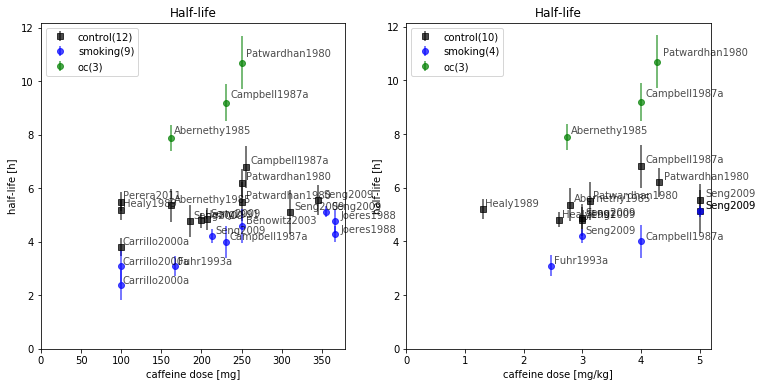

In [28]:
# plot apparent volume of distribution
data = data_pktype('thalf',pk_g)
data = data[data["mean"].notnull()]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

dinds = [idx_dose_abs_g,
         idx_dose_rel_g]
for ax, inds in zip((ax1, ax2), dinds):
    df = data[inds]
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y = df_category["mean"]
        yerr = df_category["se"]
        #sns.distplot( y,ax =ax,color=ccolors[category],  label=f"{category}({len(x)})",kde_kws={'clip': (0.0,100000 )})

        ax.errorbar(x, y,yerr=yerr,color=ccolors[category], fmt=markers[category],  label=f"{category}({len(x)})", alpha=0.7)
        for i, txt in enumerate(df_category[('study', '')]):
            ax.annotate(txt, (x.iloc[[i]]+0.02*x.iloc[[i]].mean(),
                              y.iloc[[i]]+0.02*y.iloc[[i]].mean()), alpha=0.7)
    
for ax in (ax1, ax2):
    ax.set_title("Half-life")
    ax.set_ylabel('half-life [h]')
    ax.set_ylim(bottom=0)
    ax.legend(loc="upper left")
    
for ax in (ax1, ):
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)

    ax.set_xlabel('caffeine dose [mg]')
for ax in (ax2, ):
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)
    ax.set_xlabel('caffeine dose [mg/kg]')

## cmax(peak concentration)

### Individuals

cmax (40)
units: ['µg/ml']


/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


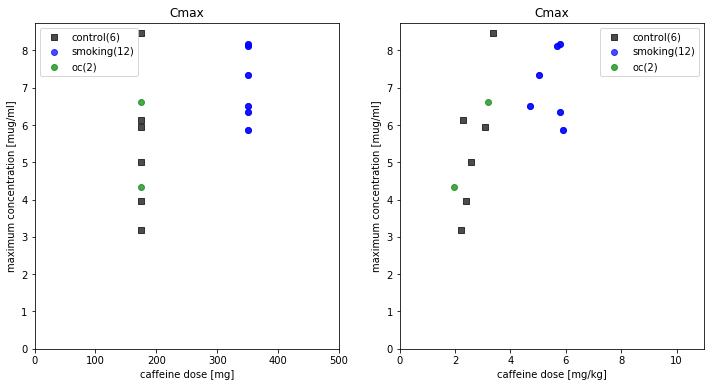

In [29]:
# plot apparent volume of distribution
data = data_pktype('cmax',pk_i)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

dinds = [idx_dose_abs_i,
         idx_dose_rel_i]
for ax, inds in zip((ax1, ax2), dinds):
    df = data[inds]
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y = df_category.value
        ax.scatter(x, y,color=ccolors[category], marker=markers[category], label=f"{category}({len(x)})", alpha=0.7)
for ax in (ax1, ax2):
    ax.set_title("Cmax")
    ax.set_ylabel('maximum concentration [mug/ml]')
    ax.set_ylim(bottom=0)
    ax.legend()
    
    
for ax in (ax1, ):
    ax.set_xlim(0, 500)
    ax.set_xlabel('caffeine dose [mg]')
for ax in (ax2, ):
    ax.set_xlim(0, 11)
    # ax.set_ylim(0, 10)
    ax.set_xlabel('caffeine dose [mg/kg]')



### Groups

cmax (44)
units: ['µg/ml' 'µmol/l']


/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


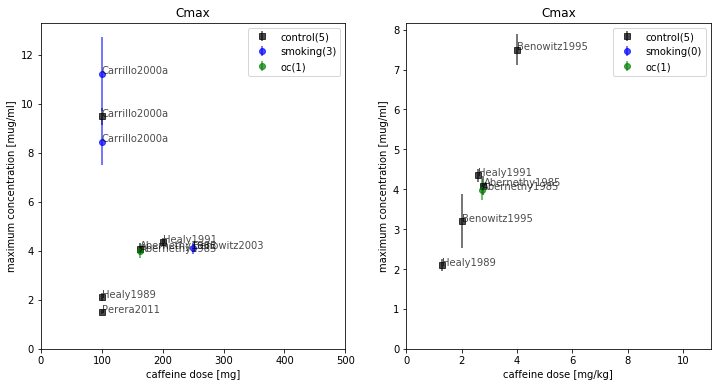

In [30]:
# plot apparent volume of distribution
data = data_pktype('cmax',pk_g)
data = data[data["mean"].notnull()]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

dinds = [idx_dose_abs_g,
         idx_dose_rel_g]
for ax, inds in zip((ax1, ax2), dinds):
    df = data[inds]
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y = df_category["mean"]
        yerr = df_category["se"]
        #sns.distplot( y,ax =ax,color=ccolors[category],  label=f"{category}({len(x)})",kde_kws={'clip': (0.0,100000 )})

        ax.errorbar(x, y,yerr=yerr,color=ccolors[category], fmt=markers[category],  label=f"{category}({len(x)})", alpha=0.7)
        for i, txt in enumerate(df_category[('study', '')]):
            ax.annotate(txt, (x.iloc[[i]],
                              y.iloc[[i]]), alpha=0.7)
    
for ax in (ax1, ax2):
    ax.set_title("Cmax")
    ax.set_ylabel('maximum concentration [mug/ml]')
    ax.set_ylim(bottom=0)
    ax.legend()
    
    
for ax in (ax1, ):
    ax.set_xlim(0, 500)
    ax.set_xlabel('caffeine dose [mg]')
for ax in (ax2, ):
    ax.set_xlim(0, 11)
    # ax.set_ylim(0, 10)
    ax.set_xlabel('caffeine dose [mg/kg]')



## AUC

In [31]:
 pk_i[pk_i.apply(lambda pk: (pk.pktype in ['auc_inf','auc_end']), axis=1)].groupby("unit").count()

,pktype,tissue,interventions,substance_name,individual_pk,value,group_pk,mean,se,time,...,"(height, unit)","(height, value)","(fasted, count)","(fasted, unit)","(fasted, value)","(alcohol, count)","(medication type, choice)","(medication type, count)","(CYP2D6 genotype, choice)","(CYP2D6 genotype, count)"
unit,,,,,,,,,,,,,,,,,,,,,
mg*h/l,252,252,252,252,252,252,0,0,0,48,...,0,0,48,48,48,0,0,0,0,0
µg*h/ml,44,44,44,44,44,44,0,0,0,0,...,24,24,0,0,0,0,0,0,0,0
µg/ml*h,40,40,40,40,40,40,0,0,0,16,...,0,0,0,0,0,0,0,0,0,0


### Individuals

/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


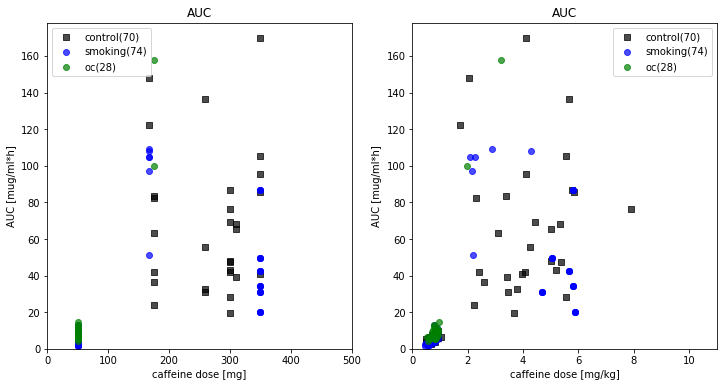

In [32]:
# plot apparent volume of distribution
#data = data_pktype('auc_inf',pk_i)
data = pk_i[pk_i.apply(lambda pk: (pk.pktype in ['auc_inf','auc_end']) , axis=1)]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

dinds = [idx_dose_abs_i,
         idx_dose_rel_i]
for ax, inds in zip((ax1, ax2), dinds):
    df = data[inds]
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y = df_category.value
        ax.scatter(x, y,color=ccolors[category], marker=markers[category], label=f"{category}({len(x)})", alpha=0.7)

for ax in (ax1, ax2):
    ax.set_title("AUC")
    ax.set_ylabel('AUC [mug/ml*h]')
    ax.set_ylim(bottom=0)
    ax.legend()
    
    
for ax in (ax1, ):
    ax.set_xlim(0, 500)
    ax.set_xlabel('caffeine dose [mg]')
for ax in (ax2, ):
    ax.set_xlim(0, 11)
    ax.set_xlabel('caffeine dose [mg/kg]')



### Groups

In [33]:
 pk_g[pk_g.apply(lambda pk: (pk.pktype in ['auc_inf','auc_end']), axis=1)].groupby("unit").count()

,pktype,tissue,interventions,substance_name,individual_pk,value,group_pk,mean,se,time,...,"(metabolic ratio, min)","(metabolic ratio, unit)","(medication type, choice)","(medication type, count)","(smoking amount (packyears), count)","(smoking amount (packyears), min)","(smoking amount (packyears), unit)","(caffeine amount (beverages), count)","(caffeine amount (beverages), max)","(caffeine amount (beverages), unit)"
unit,,,,,,,,,,,,,,,,,,,,,
mg*h/l,39,39,39,39,0,0,39,39,37,28,...,0,0,0,0,0,0,0,2,2,2
µg*h/ml,6,6,6,6,0,0,6,6,2,0,...,0,0,0,0,0,0,0,0,0,0
µg*min/ml,58,58,58,58,0,0,58,58,58,0,...,0,0,0,0,0,0,0,0,0,0
µmol*h/l,6,6,6,6,0,0,6,4,4,0,...,0,0,0,0,0,0,0,0,0,0
µmol/l*h,4,4,4,4,0,0,4,4,4,0,...,0,0,0,0,0,0,0,0,0,0


/home/mkoenig/envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


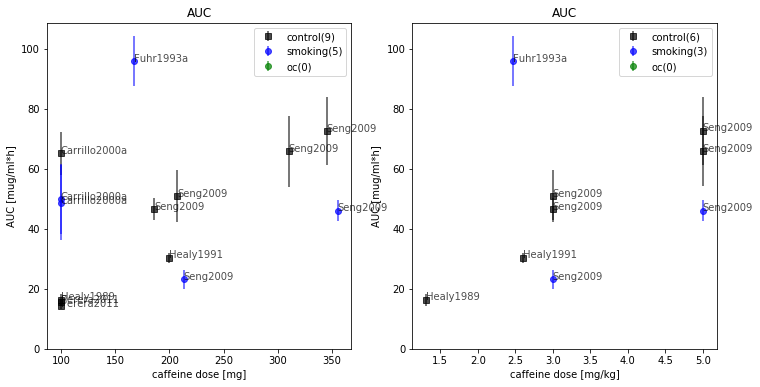

In [34]:
# plot apparent volume of distribution
data = pk_g[pk_g.apply(lambda pk: (pk.pktype in ['auc_inf','auc_end']) , axis=1)]


data = data[data["mean"].notnull()]
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

dinds = [idx_dose_abs_g,
         idx_dose_rel_g]
for ax, inds in zip((ax1, ax2), dinds):
    df = data[inds]
    for category in ccolors:
        cf_filter = cateogry_filter[category]
        df_category = filter_df(cf_filter,df)
        x = df_category["value_intervention"]
        #x = df_category[("age","value")]

        y = df_category["mean"]
        yerr = df_category["se"]
        #sns.distplot( y,ax =ax,color=ccolors[category],  label=f"{category}({len(x)})",kde_kws={'clip': (0.0,100000 )})

        ax.errorbar(x, y,yerr=yerr,color=ccolors[category], fmt=markers[category],  label=f"{category}({len(x)})", alpha=0.7)
        for i, txt in enumerate(df_category[('study', '')]):
            ax.annotate(txt, (x.iloc[[i]],
                              y.iloc[[i]]), alpha=0.7)
    
for ax in (ax1, ax2):
    ax.set_title("AUC")
    ax.set_ylabel('AUC [mug/ml*h]')
    ax.set_ylim(bottom=0)
    ax.legend()
    
    
for ax in (ax1, ):
    #ax.set_xlim(0, 500)
    ax.set_xlabel('caffeine dose [mg]')
for ax in (ax2, ):
    #ax.set_xlim(0, 11)
    ax.set_xlabel('caffeine dose [mg/kg]')

